In [2]:
# import libraries
import numpy as np
import numpy.linalg as la
import pylab as p

## 2.2 Root Finding

In [27]:
# centeral difference approximation
def central_diff(f, x: float, step_size: float) -> float:
    return (f(x+step_size/2) - f(x-step_size/2))/step_size
# bisection algorithm
def bisection(func, x_minus, x_plus, N, eps):
    x_hist = []
    for _ in range(N):
        x = (x_minus + x_plus)/2
        if func(x_plus)*func(x) > 0:
            x_plus = x
        else:
            x_minus = x
        if abs(func(x)- 0) < eps:
            break
        x_hist.append(x)
    return x, x_hist
# newton raphson method
def newtonraphson(func, x_o, N, eps):
    x_hist = [x_o]
    x = x_o
    for _ in range(N):
        delta_x = -(func(x)/central_diff(func, x, eps))
        x = x + delta_x
        x_hist.append(x)
        if abs(func(x) - 0) < eps:
            break    
    return x, x_hist  

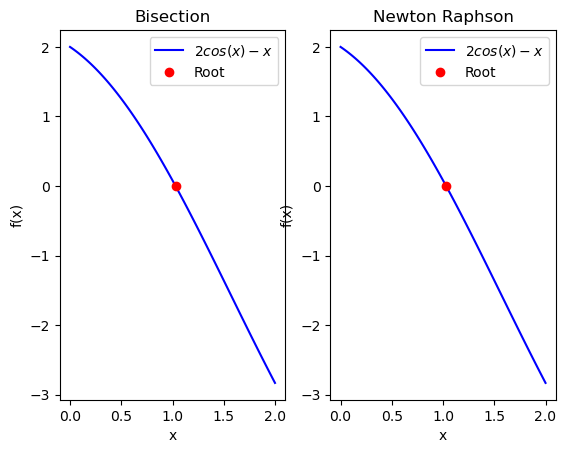

In [28]:
# testing bisection and newton raphson
x = np.linspace(0,2,100)
steps = 1000
eps = 1e-6
def func(x):
    return 2*np.cos(x) - x

y = func(x)
root_bisect, root_bisect_hist = bisection(func, 0, 3, steps, eps)
root_newtonraphson, root_newtonraphson_hist = newtonraphson(func, 0, steps, eps)

p.subplot(1,2,1)
p.xlabel('x')
p.ylabel('f(x)')
p.title('Bisection')
p.plot(x, y, 'b', root_bisect, func(root_bisect),'ro')
p.legend([r'$2cos(x) - x$', r'Root'])

p.subplot(1,2,2)
p.xlabel('x')
p.ylabel('f(x)')
p.title('Newton Raphson')
p.plot(x, y, 'b', root_newtonraphson, func(root_newtonraphson),'ro')
p.legend([r'$2cos(x) - x$', r'Root'])


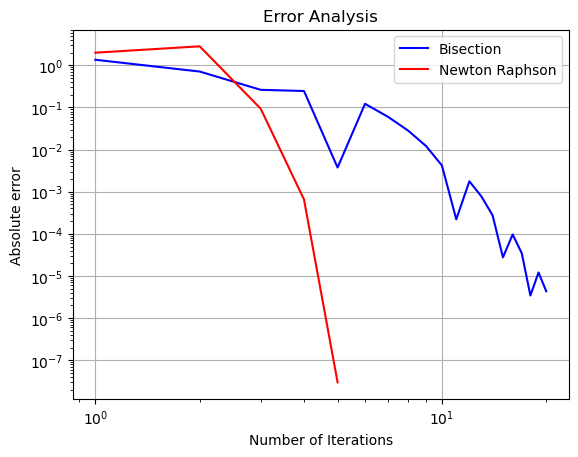

In [34]:
# Error analysis bisection and newton raphson

p.plot(np.arange(1,len(root_bisect_hist)+1), abs(func(root_bisect_hist)), 'b', 
       np.arange(1,len(root_newtonraphson_hist)+1), abs(func(root_newtonraphson_hist)), 'r')
p.xlabel('Number of Iterations')
p.ylabel('Absolute error')
p.title('Error Analysis')
p.xscale("log")
p.yscale("log")
p.grid(True)
p.legend(['Bisection', 'Newton Raphson'])